In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from glob import glob

import cv2
import matplotlib.pylab as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

        



## Reading the IMAGES

In [2]:
# List of images in Dog and Cat Datafolder
dog_files = glob('../input/cat-and-dog/training_set/training_set/dogs/*.jpg')
cat_files = glob('../input/cat-and-dog/training_set/training_set/cats/*.jpg')

In [3]:
len(dog_files), len(cat_files)

(4005, 4000)

In [4]:
# Read an example image file
img_mpl = plt.imread(cat_files[10])
img_cv2 = cv2.imread(cat_files[10])
print(img_mpl.shape, img_cv2.shape)
print(type(img_mpl))
#print(img_mpl)


(375, 499, 3) (375, 499, 3)
<class 'numpy.ndarray'>


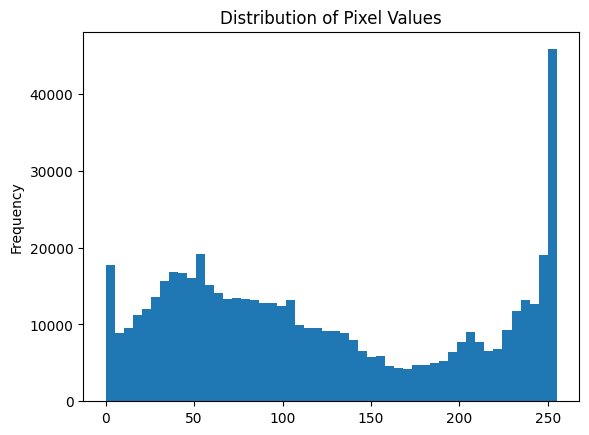

In [5]:
pd.Series(img_mpl.flatten()).plot(kind = 'hist', bins = 50, title ='Distribution of Pixel Values')
plt.show()

# Display Images

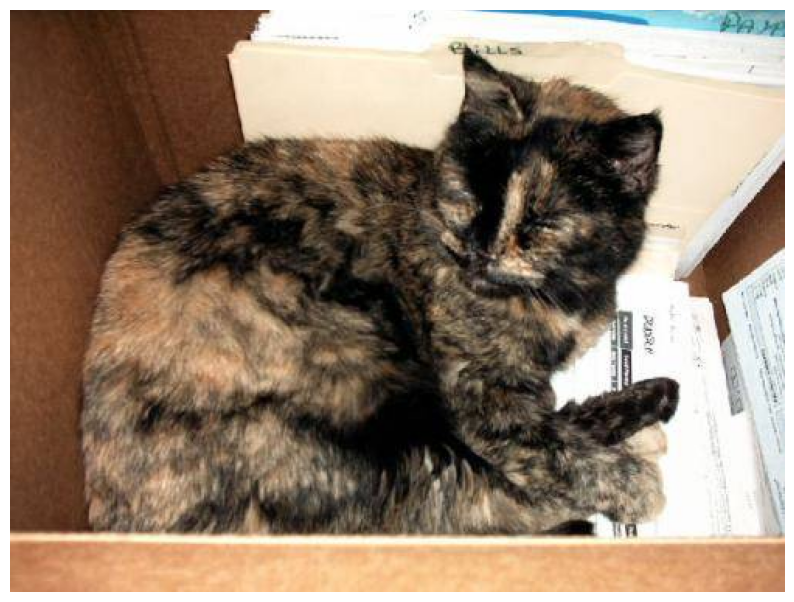

In [6]:
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow (img_mpl)
ax.axis('off')
plt.show()

# RGB Channels

### An RGB image has three channels: red, green and blue. RGB channels roughly follow the color receptors in the human eye and are used in computer displays and image scanner

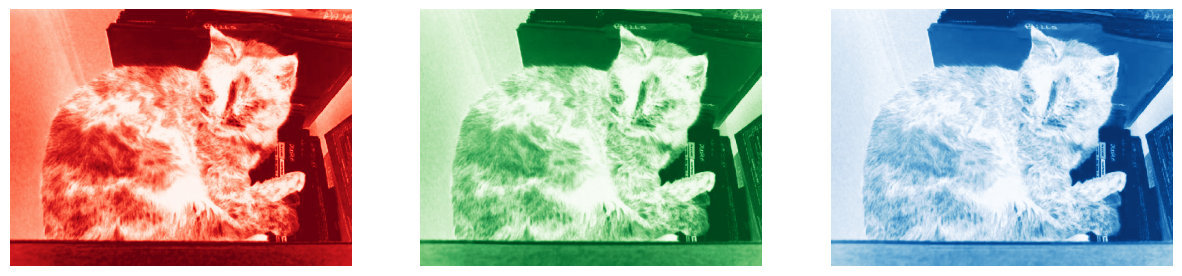

In [7]:
# Display RGB Channels of our Image
fig, axs = plt.subplots(1,3,figsize = (15,5))
axs[0].imshow (img_mpl[:,:,0],cmap = 'Reds')
axs[1].imshow (img_mpl[:,:,1],cmap = 'Greens')
axs[2].imshow (img_mpl[:,:,2],cmap = 'Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

## Matplotlib vs cv2 Numpy Arrays
### 1) matplotlib reads in channels as RGB
### 2) cv2 reads in channels as BGR

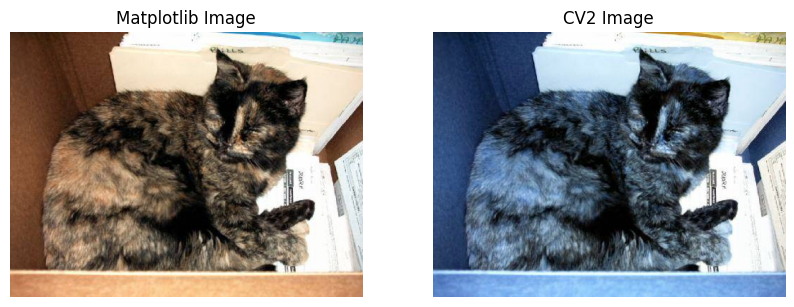

In [8]:
# Display RGB Channels of our Image
fig, axs = plt.subplots(1,2,figsize = (10,5))
axs[0].imshow (img_mpl)
axs[1].imshow (img_cv2)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('Matplotlib Image')
axs[1].set_title('CV2 Image')

plt.show()

# Image Manipulation

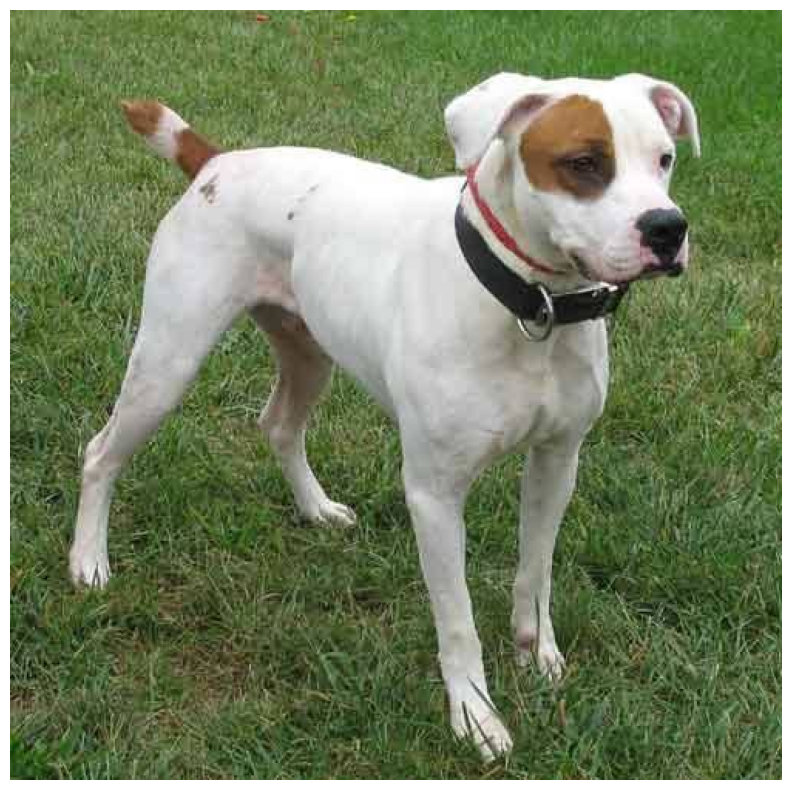

In [9]:
img = plt.imread (dog_files[4])
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow (img)
ax.axis('off')
plt.show()

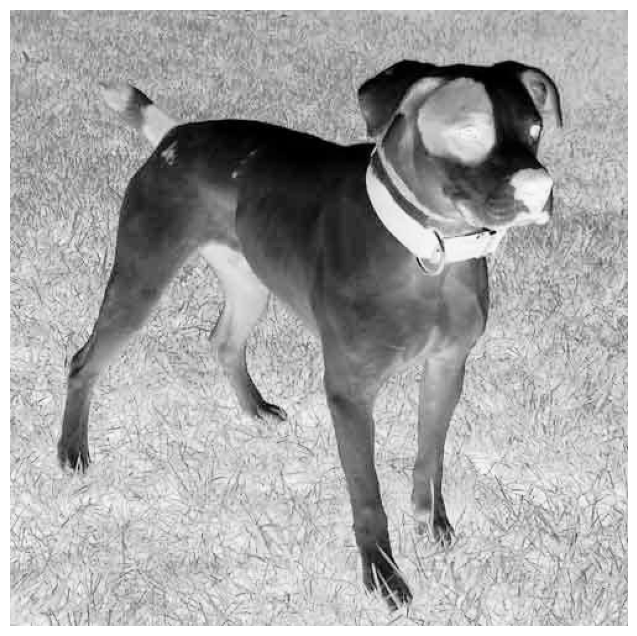

In [10]:
# Create gray image of the above image
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(img_gray, cmap = 'Greys')
ax.axis ('off')
plt.show()

# Resizing and Scaling

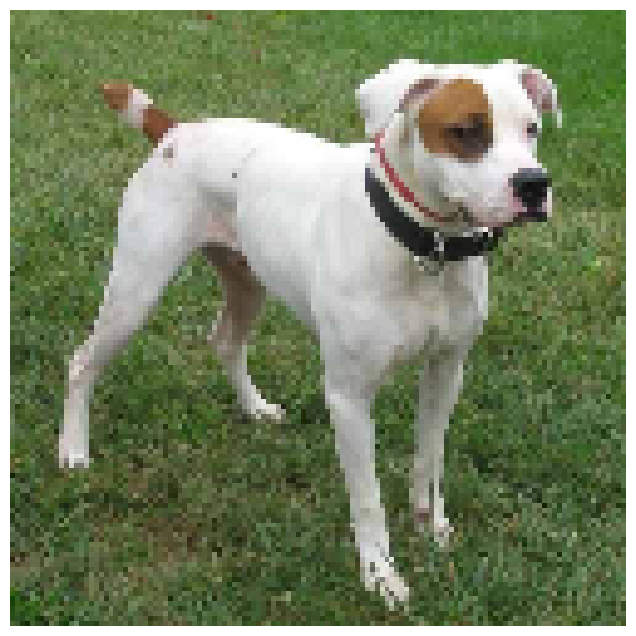

In [11]:
img_resized = cv2.resize(img, None, fx = 0.25, fy = 0.25)
fig, ax = plt.subplots(figsize= (8,8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

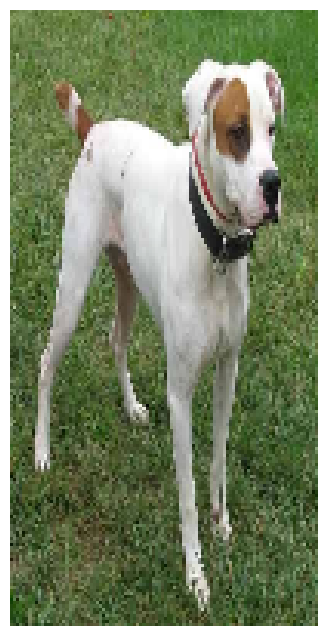

In [12]:
# Downscaling the image
img_resized = cv2.resize(img,(100,200))
fig, ax = plt.subplots(figsize= (8,8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

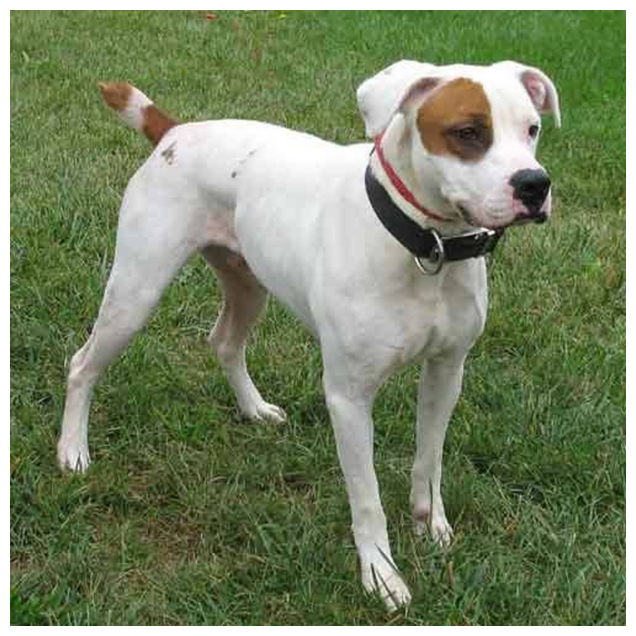

In [13]:
# Upscaling the image
img_resized = cv2.resize(img,(5000,5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize= (8,8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

# CV2 Kernels
### Filtering, Bluring, Sharpening....

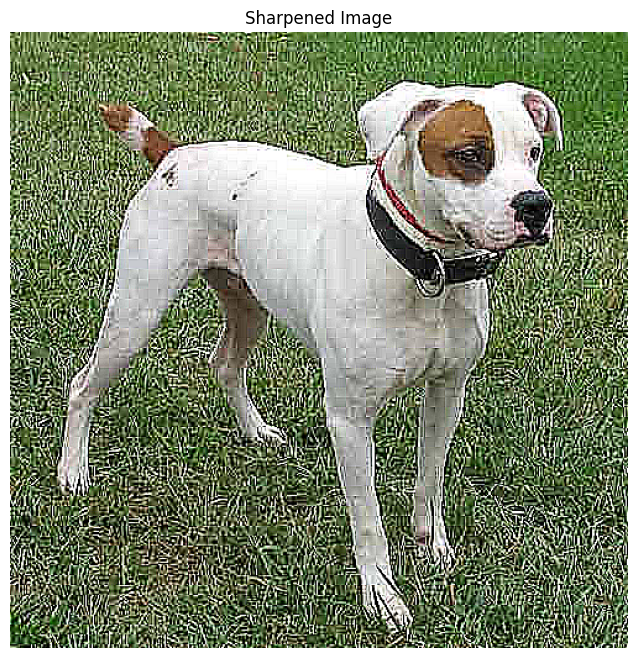

In [14]:
# Sharpen the Image
kernel_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
sharpened = cv2.filter2D(img,-1, kernel_sharpening)
fig, ax = plt.subplots(figsize= (8,8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

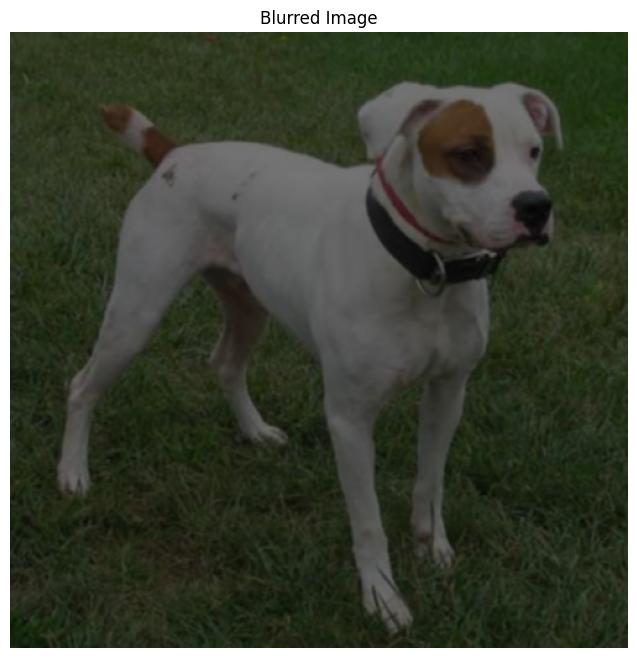

In [15]:
# Bluring the image
kernel_3x3 = np.ones((3,3),np.float32)/20
blurred = cv2.filter2D(img,-1,kernel_3x3)
fig, ax = plt.subplots(figsize= (8,8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

In [16]:
plt.imsave('mpl_dog.png',sharpened)
cv2.imwrite('cv2_dog.png', sharpened)

True